# **Kaggle Handwritten Digit Recognition**

## What is Handwritten Digit Recognition?
![](https://www.researchgate.net/profile/Hugo-Larochelle/publication/200744481/figure/fig1/AS:668968306098181@1536505881710/Samples-from-the-MNIST-digit-recognition-data-set-Here-a-black-pixel-corresponds-to-an.png)

**The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.**

<div id='content'></div>

## Index of Content

* [**Import the libraries and load the dataset**](#Chapter1)
* [**Preprocess the data**](#Chapter2)
* [**Create the model**](#Chapter3)
* [**Train the model**](#Chapter4)
* [**Evaluate on validation data**](#Chapter5)
* [**prediction on test data**](#Chapter6)
* [**submission**](#Chapter7)

## NN (Neural networks)
Neural Networks mimics the working of how our brain works. They have emerged a lot in the era of advancements in computational power.

![](https://miro.medium.com/max/1194/1*14-ce3jNHqJ5x5eb7CyTbw.png)

Deep learning is the acronym for Neural Networks, the network connected with multilayers. The layers are composited form nodes. A node is just a perception which takes an input performs some computation and then passed through a node’s activation function, to show that up to what context signal progress proceeds through the network to perform classification.

## CNN (Convolutional Neural Network)
Now let’s discuss the Convolutional Neural Networks, CNN has become famous among the recent times. CNN is part of deep, feed forward artificial neural networks that can perform a variety of task with even better time and accuracy than other classifiers, in different applications of image and video recognition, recommender system and natural language processing.

![](https://miro.medium.com/max/1144/1*22R-AyQ-oXb8Flod9PsyNw.png)

Use of CNN have spread as Facebook uses neural nets for their automatic tagging algorithms, google for photo search Amazon for their product recommendations, Pinterest for their home feed personalization and Instagram for search infrastructure. Image classification or object recognition is a problem is passing an image as a parameter and predicting whether a condition is satisfied or not (cat or not, dot or not), or the probability or most satisfying condition for an image. We are able to quickly recognize patterns, generalize from previous information and knowledge.

![](https://miro.medium.com/max/716/1*u_kP2X3t2LF_WyiLwL57Gg.png)

<div id='Chapter1'></div>

## Import the libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
import warnings
warnings.filterwarnings('ignore')

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

In [3]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
Test = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
sns.set(palette="Paired")
plt.rcParams['figure.dpi'] = 120

In [7]:
train_y=train['label']
train_x=train.drop(labels = ["label"],axis = 1)
train_y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

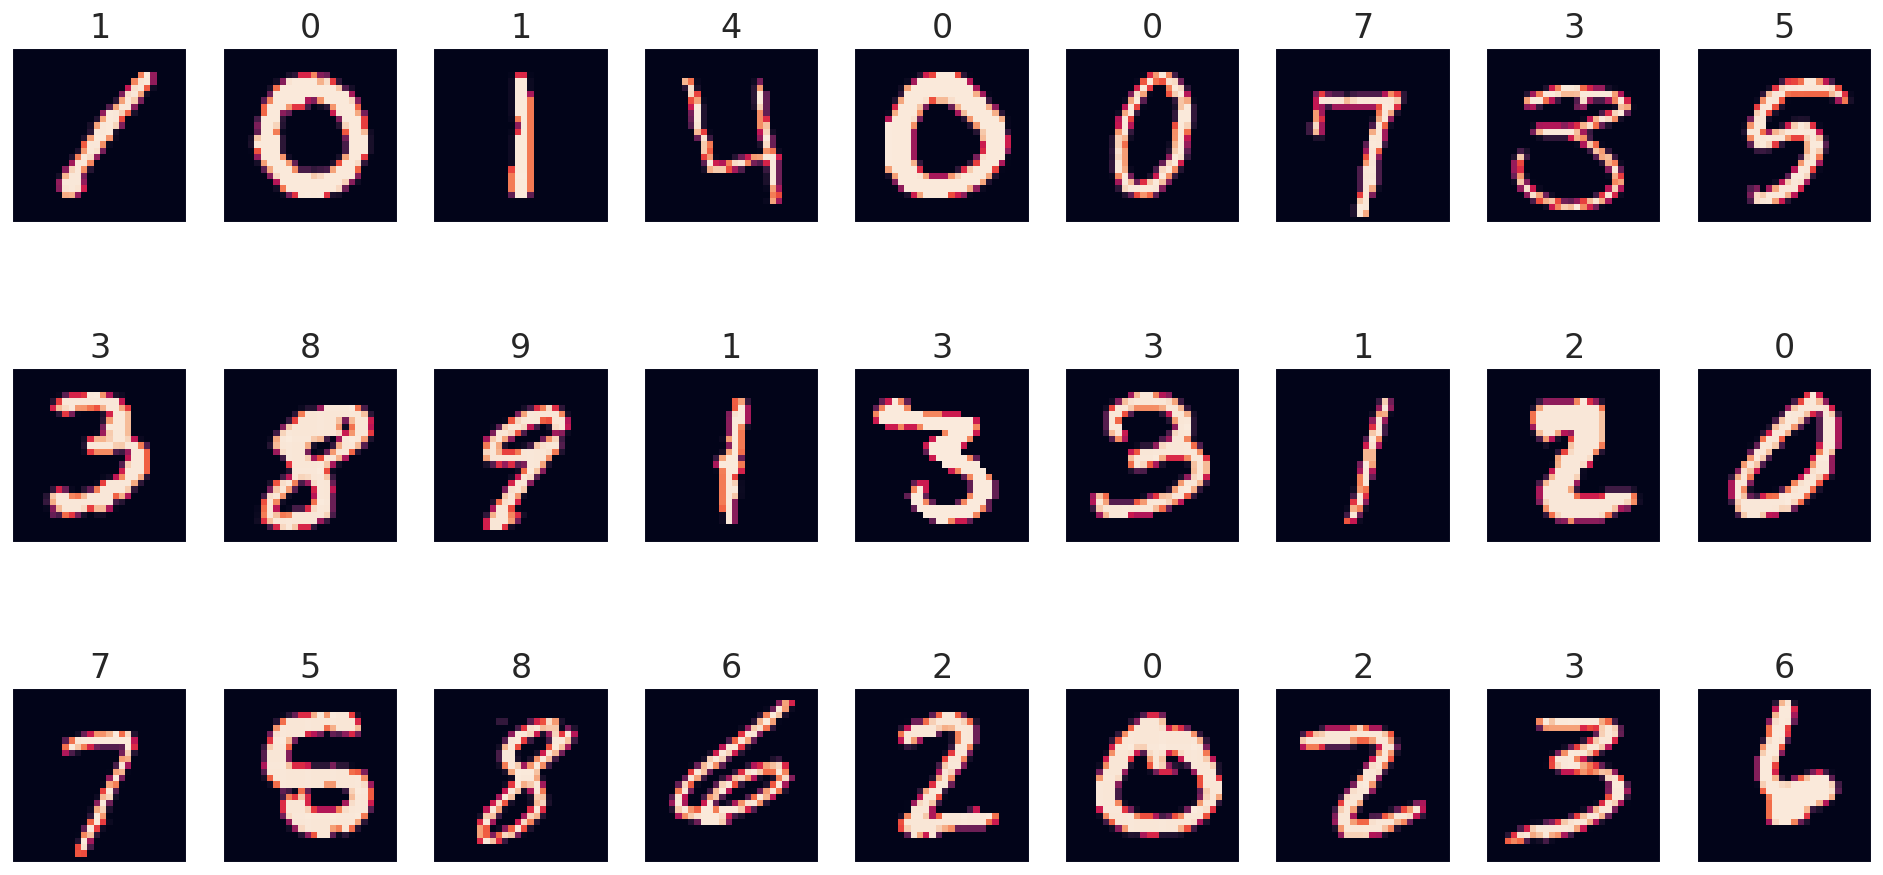

In [8]:
plt.figure(figsize=(20, 10))
for i in range(27):
    plt.subplot(3, 9, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x.iloc[i].to_numpy().reshape((28,28,1)))
    plt.title(train_y[i],size = 20)
plt.show()

In [9]:
a = dict(train['label'].value_counts())
a = dict(sorted(a.items()))

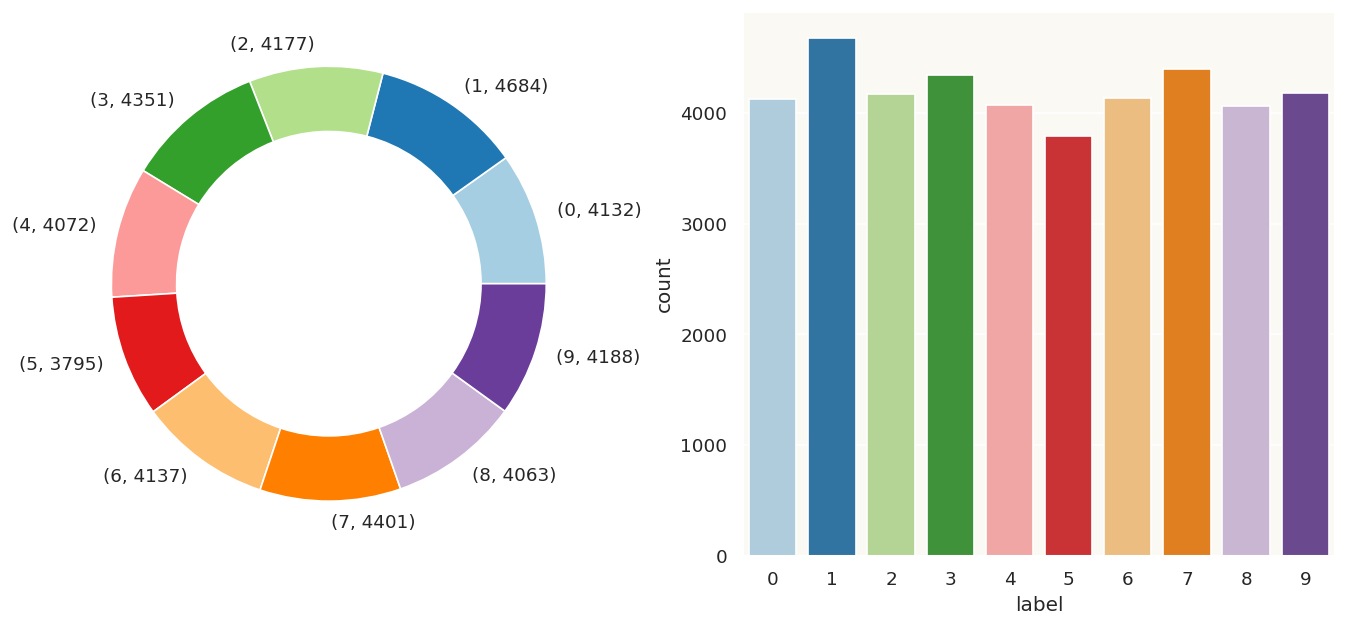

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color) 
ax1.pie(a.values(),wedgeprops=dict(width=0.3, edgecolor='w') ,labels=a.items(), radius=1)
ax2 = sns.countplot(train['label'])
plt.show()

**go to [Index](#content)**

<div id='Chapter2'></div>

##  Preprocess the data

The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network. The dimension of the training data is (42000,28,28). The CNN model will require one more dimension so we reshape the matrix to shape (42000,28,28,1).

In [11]:
train_x = train_x/255.0
test = Test/255.0
print("X_train Shape  : ",train_x.shape)
print("Test Shape     : ",train_y.shape)

X_train Shape  :  (42000, 784)
Test Shape     :  (42000,)


In [12]:
train_x = train_x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("X_train Shape  : ",train_x.shape)
print("Test Shape     : ",train_y.shape)

X_train Shape  :  (42000, 28, 28, 1)
Test Shape     :  (42000,)


In [13]:
x_train,x_val,y_train,y_val = train_test_split(train_x,train_y,test_size = 0.2,random_state = 12345)

In [14]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600,), (8400,))

**go to [Index](#content)**

<div id='Chapter3'></div>

##  Create the model
Now we will create our CNN model. A CNN model generally consists of convolutional and pooling layers. It works better for data that are represented as grid structures, this is the reason why CNN works well for image classification problems. The dropout layer is used to deactivate some of the neurons and while training, it reduces offer fitting of the model. We will then compile the model with the Adam optimizer.

## Layers of Convolutional neural network
The multiple occurring of these layers shows how deep our network is, and this formation is known as the deep neural network.

![](https://miro.medium.com/max/788/1*0NwaOkzvom6YpMZoIgWTiQ.png)


- **Input**: raw pixel values are provided as input.
- **Convolutional layer**: Input layers translates the results of neuron layer. There is need to specify the filter to be used. Each filter can only be a 5*5 window that slider over input data and get pixels with maximum intensities.
- **Rectified linear unit [ReLU] layer**: provided activation function on the data taken as an image. In the case of back propagation, ReLU function is used which prevents the values of pixels form changing.
- **Pooling layer**: Performs a down-sampling operation in volume along the dimensions (width, height).
- **Fully connected layer**: score class is focused, and a maximum score of the input digits is found.

In [15]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

2021-11-11 16:27:27.945233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 16:27:28.043776: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 16:27:28.044557: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 16:27:28.045722: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [16]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),metrics =['accuracy'])

**go to [Index](#content)**

<div id='Chapter4'></div>

## Train the model

The model.fit() function of Keras will start the training of the model. It takes the training data, validation data, epochs, and batch size.

In [17]:
history = model.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=30,
    verbose=1,
    validation_data=(x_val,y_val),
)

2021-11-11 16:27:30.679238: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2021-11-11 16:27:31.984042: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


34/34 [==============================] - 7s 20ms/step - loss: 1.2610 - accuracy: 0.5923 - val_loss: 0.4270 - val_accuracy: 0.8844
Epoch 2/30
34/34 [==============================] - 0s 9ms/step - loss: 0.4646 - accuracy: 0.8522 - val_loss: 0.2432 - val_accuracy: 0.9282
Epoch 3/30
34/34 [==============================] - 0s 9ms/step - loss: 0.3172 - accuracy: 0.9008 - val_loss: 0.1682 - val_accuracy: 0.9515
Epoch 4/30
34/34 [==============================] - 0s 9ms/step - loss: 0.2418 - accuracy: 0.9257 - val_loss: 0.1300 - val_accuracy: 0.9611
Epoch 5/30
34/34 [==============================] - 0s 9ms/step - loss: 0.1991 - accuracy: 0.9382 - val_loss: 0.1205 - val_accuracy: 0.9633
Epoch 6/30
34/34 [==============================] - 0s 12ms/step - loss: 0.1677 - accuracy: 0.9478 - val_loss: 0.1013 - val_accuracy: 0.9708
Epoch 7/30
34/34 [==============================] - 0s 10ms/step - loss: 0.1521 - accuracy: 0.9519 - val_loss: 0.0901 - val_accuracy: 0.9731
Epoch 8/30
34/34 [==========

In [18]:
print('Loss     : {} \nAccuracy : {}'.format(history.history['loss'][-1],history.history['accuracy'][-1]))

Loss     : 0.05047791823744774 
Accuracy : 0.9834821224212646


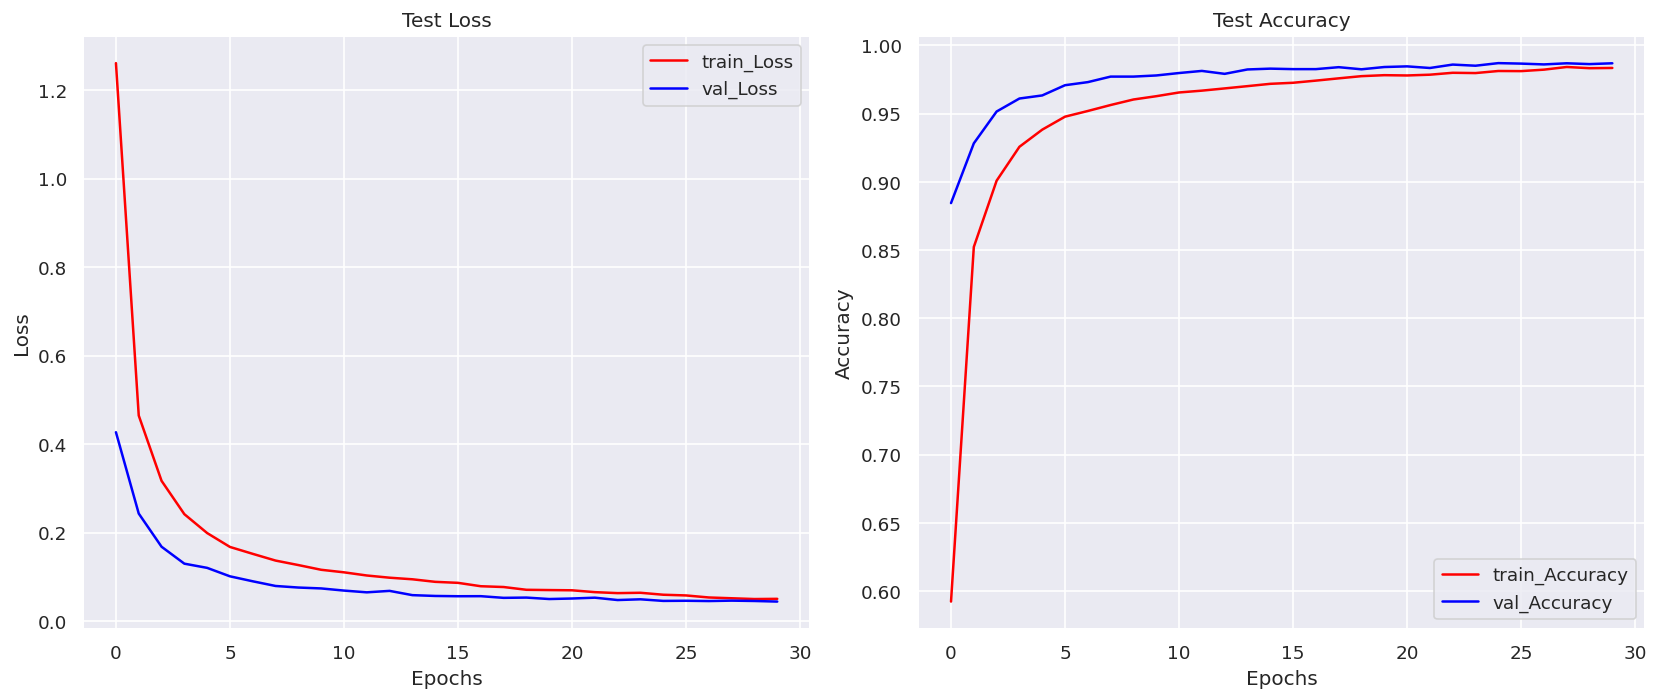

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))

ax1.plot(history.history['loss'], color='r', label="train_Loss")
ax1.plot(history.history['val_loss'], color='b', label="val_Loss")
ax1.legend()
ax1.set_title("Test Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")

ax2.plot(history.history['accuracy'], color='r', label="train_Accuracy")
ax2.plot(history.history['val_accuracy'], color='b', label="val_Accuracy")
ax2.legend()
ax2.set_title("Test Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")
fig.tight_layout()

**go to [Index](#content)**

<div id='Chapter5'></div>

## Evaluate on validation data

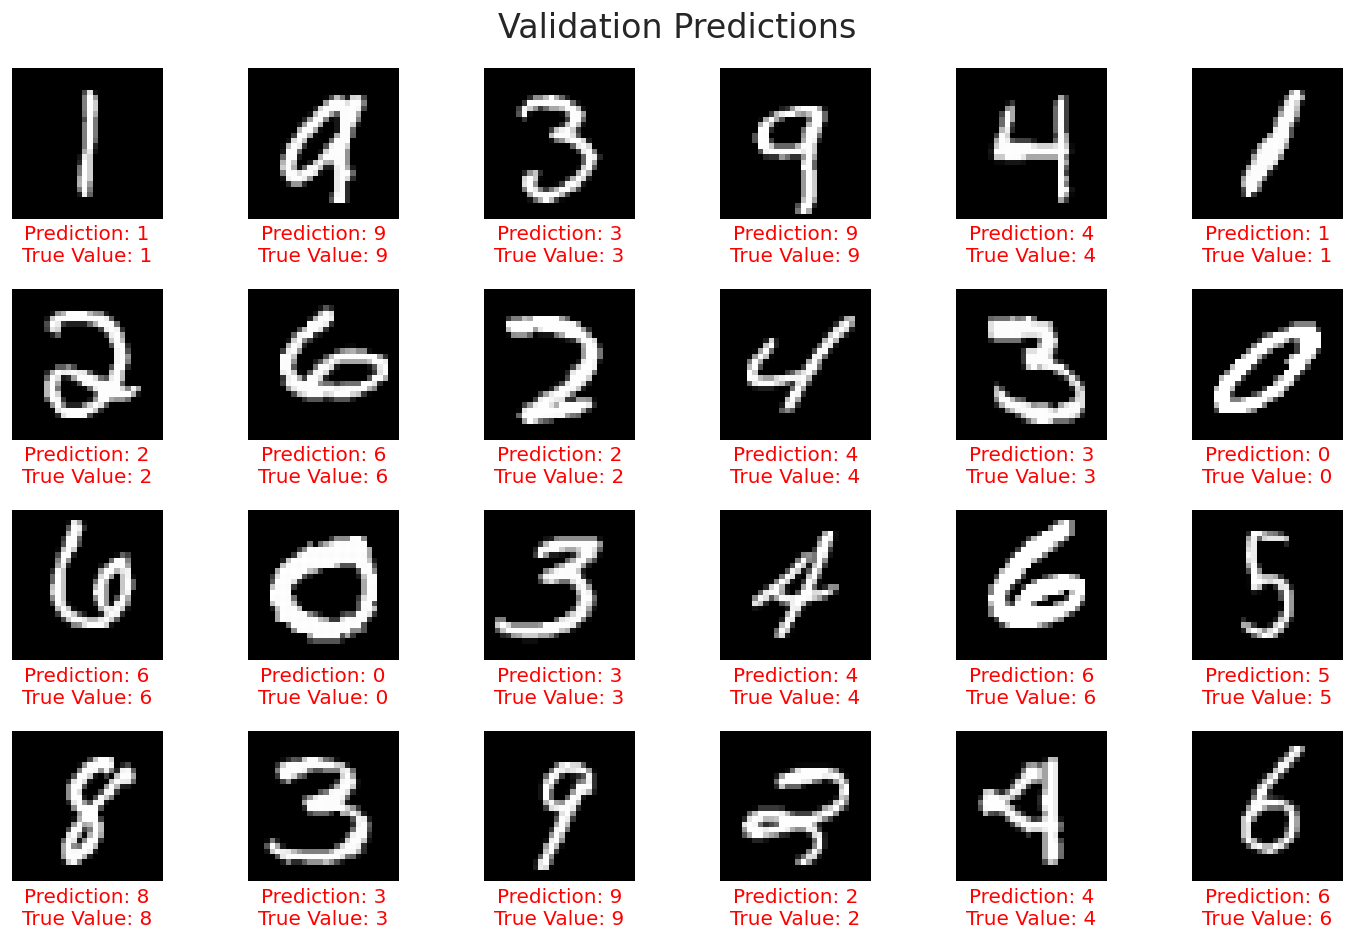

In [20]:
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.array(y_val)
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Validation Predictions", fontsize=20)
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = x_val[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}\nTrue Value: {}".format(Y_pred_classes[i], Y_true[i]),
              y=-0.35,color="red")
f.tight_layout()
    
f.show()

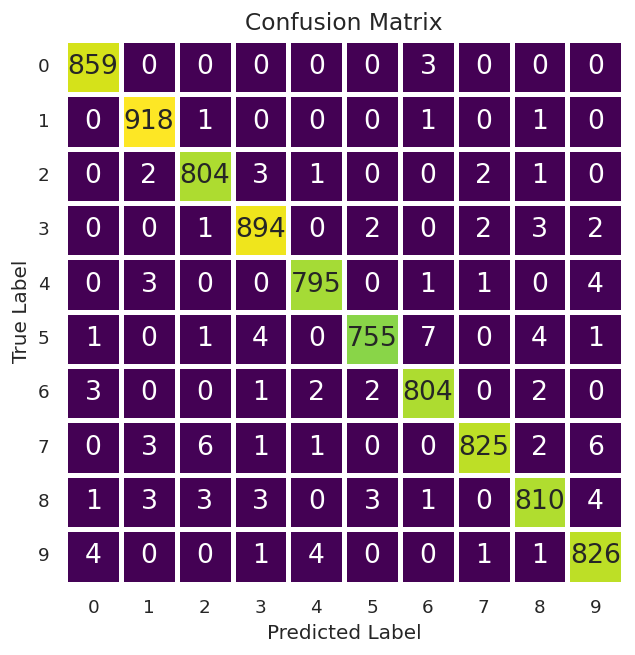

In [21]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=3,cmap="viridis",
            fmt= '.0f',ax=ax,
            cbar = False,
           annot_kws={"size": 16})
plt.yticks(rotation = 0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

**go to [Index](#content)**

<div id='Chapter6'></div>

##  Prediction on Test data
We have 28,000 images in our dataset which will be used to evaluate how good our model works. The testing data was not involved in the training of the data therefore, it is new data for our model. The MNIST dataset is well balanced so we can get around 98-99% accuracy.

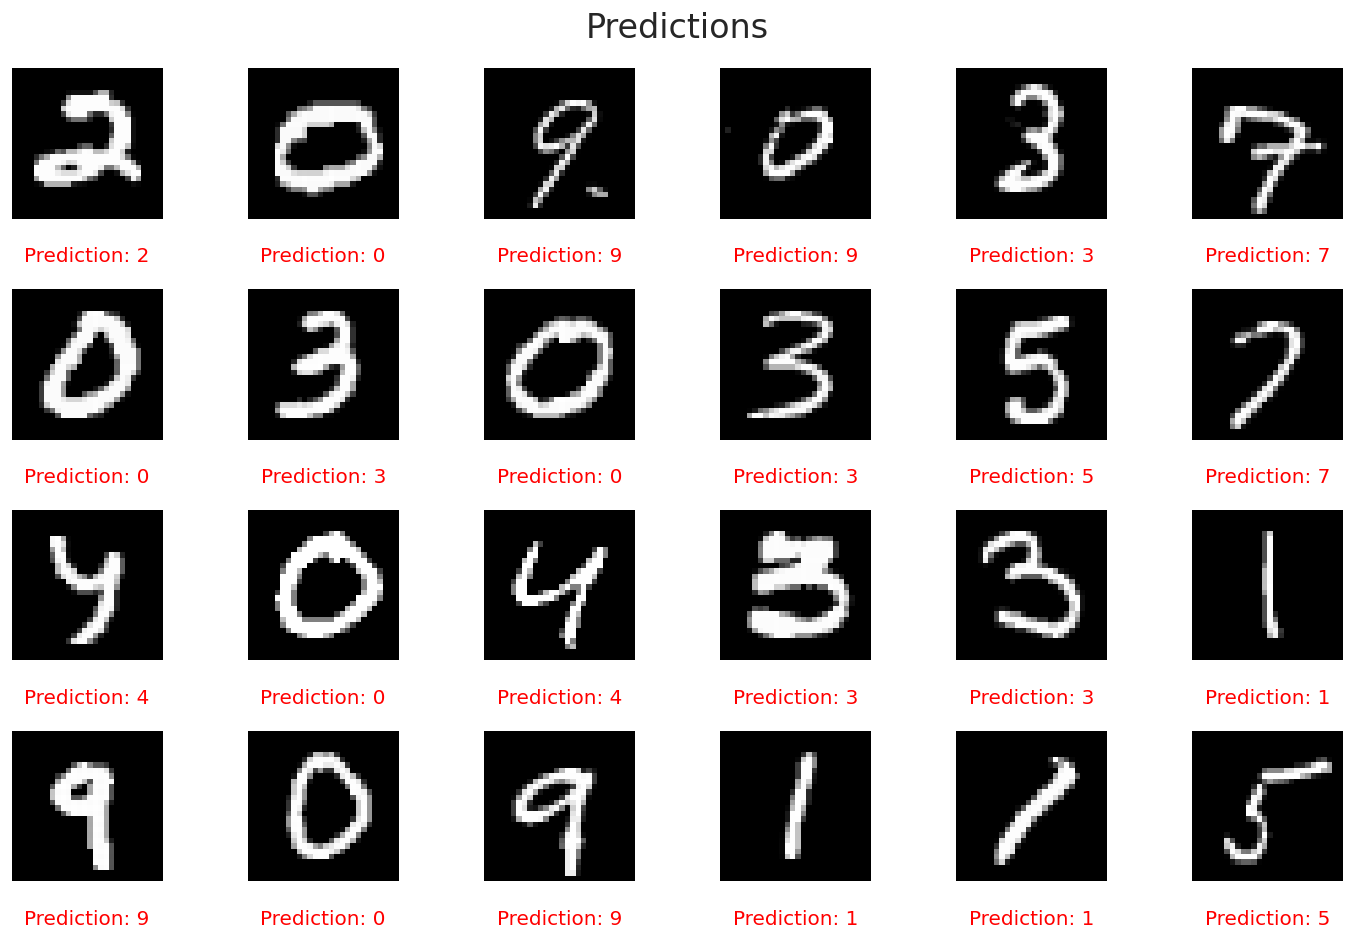

In [22]:
Y_pred = model.predict(test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Predictions", fontsize=20)
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = test[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}".format(Y_pred_classes[i]),
              y=-0.35,color="red")
f.tight_layout()
    
f.show()

**go to [Index](#content)**

<div id='Chapter7'></div>

##  Submission

In [23]:
submission = pd.DataFrame({'ImageId': range(1,28001), 'Label': Y_pred_classes})
submission.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [24]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


## **The model predict with 98.75% accuracy in kaggle Digit Recognizer competition**

# **If you like, an upvote would be deeply appreciated. Thanks! :)**

**go to [Index](#content)**